### Plot the fraction of SIR during the dynamic

In [12]:
import csv
import configparser
import numpy

import matplotlib.pyplot as plt

from operator import itemgetter
from os import listdir
from os.path import isfile, isdir, join, exists

In [13]:
plt.rcParams['figure.figsize'] = [10,5]

In [14]:
mypath = '../../log/EmailGraph01/'
dirs = [f for f in listdir(mypath) if isdir(join(mypath, f))]
memlogs = [join(join(mypath, f), 'memoryLog.csv') for f in dirs]
N_AGENTS = 1133
memlogs

['../../log/EmailGraph01/2019_19_01_22_53_03/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_22_52_41/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_23_03_49/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_22_54_16/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_22_56_09/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_22_39_48/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_22_55_46/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_23_06_37/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_22_50_58/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_22_58_14/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_23_06_32/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_22_44_31/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_22_41_25/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_22_49_33/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_23_03_57/memoryLog.csv',
 '../../log/EmailGraph01/2019_19_01_23_01_48/memoryLog.csv',
 '../../log/EmailGraph01

In [15]:
N_USERS = 1133
time = 500

lost graphs: 0.016666666666666666 %
lost graphs: 0.03333333333333333 %
lost graphs: 0.05 %
lost graphs: 0.06666666666666667 %
lost graphs: 0.08333333333333333 %
lost graphs: 0.1 %
lost graphs: 0.11666666666666667 %
lost graphs: 0.13333333333333333 %
lost graphs: 0.15 %
lost graphs: 0.16666666666666666 %


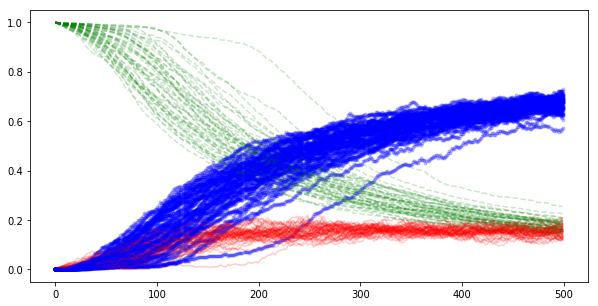

In [16]:
counter = 0
for file in memlogs:
    time_SIR_frac = [[0,0,0]]*(time + 1)
    time_SIR_frac = numpy.array(time_SIR_frac)
    SIR_dict = {'s' : 0, 'i':1, 'r': 2}

    with open(file, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            if '#' in row[0]: continue
            if 'agent' in row: continue
            try:
                time_SIR_frac[int(float(row[1]))][SIR_dict[row[3]]] +=1
            except IndexError as e:
                print(e)
                print(row)
                break

        #list_of_tup.append((int(row[0]), int(row[1]), row[2], int(row[3])))
        #listup = [e[3] for e in [element for element in list_of_tup if element[2] == 'u']]
        #listdown = [e[3] for e in [element for element in list_of_tup if element[2] == 'd']]

        x = time_SIR_frac[1:] / N_USERS 
        t = range(time)
        if all(i >= 0.99 for i in [e[0] for e in x]) :
            counter += 1
            print("lost graphs:", counter/len(memlogs), "%")
            continue
        #plt.figure()
        plt.plot(t, [e[0] for e in x], 'g--', alpha=0.2)
        plt.plot(t, [e[1] for e in x], 'r-', alpha=0.2)
        plt.plot(t, [e[2] for e in x], 'b.', alpha=0.2)
        plt.show